# (CT-236) Lab 1: Simulando Redes de Poisson
---

## Dependências
Para a execução deste _notebook_ em um ambiente local, é necessário instalar as dependências `matplotlib`, e `igraph`. É possível instalar as bibliotecas mencionadas utilizando-se o `pip`:
```bash
pip install --user python-igraph
pip install --user matplotlib
```

## Bibliotecas e funções auxiliares

In [1]:
from igraph import *
from PIL import Image
from matplotlib import pyplot as plt
from math import log, floor, exp
import matplotlib.image as mpimg
import random

def decision(probability):
    return random.random() < probability

def plot_graph(g, layout_name, filename):
    visual_style = {}
    visual_style["vertex_size"] = 2
    visual_style["edge_width"] = 1
    visual_style["bbox"] = (300, 300)
    visual_style["margin"] = 20
    visual_style["layout"] = g.layout(layout_name)
    plot(g, "plots/" + filename, **visual_style)
    return Image.open("plots/" + filename)

## Geração de redes pelo modelo binomial


In [2]:
# ==== Graph Generation ====
def generate_binomial_network(q, n):
    z = q * n
    g = Graph()
    g.add_vertices(n)
    for i in range(n):
        for j in range(i + 1, n):
                if decision(q):
                    g.add_edges([(i, j)])
    return g

---
## Limiar de conectividade

### Parâmetros editáveis

In [3]:
# ==== Parâmetros ====
num_simulations = 5
n_per_simulation = [100, 1000, 5000, 10000]
z_min = 0.0
z_max = 3.0
z_step = 0.1

# ==== Auxiliary Processing ====
z = []
aux = z_min
while aux <= z_max:
    z.append(aux)
    aux = aux + z_step

### Número médio de nós na componente gigante

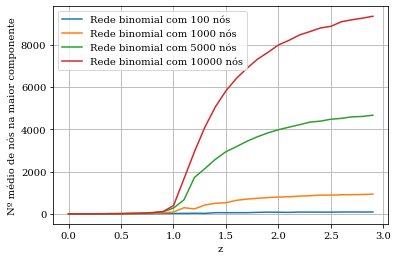

In [4]:
# Mudar a fonte (para ficar mais parecido com o LaTeX)
plt.rcParams["font.family"] = "serif"

# plot_num = 0
labels = []
#plt.figure(figsize=(20,10))
for n in n_per_simulation:
    avgs = []
    for i in range(0, len(z)):
        avgs.append(0)
        for k in range(0, num_simulations):
            g = generate_binomial_network(z[i] / n, n)
            g = g.components(STRONG)
            g = g.giant()
            avgs[i] = avgs[i] + g.vcount()
        avgs[i] = avgs[i] / num_simulations
    # plt.subplot2grid((1, len(n_per_simulation)), (0, plot_num))
    plt.plot(z, avgs)
    labels.append("Rede binomial com " + str(n) +  " nós")
    # plt.title("Rede binomial com " + str(n) +  " nós")
    #plot_num = plot_num + 1
# plt.tight_layout()
# plt.savefig('plots/nodes-in-giant-component.png')

#plt.title("Rede binomial com " + str(n) +  " nós")
plt.xlabel("z")
plt.ylabel("Nº médio de nós na maior componente")
plt.grid(True)
plt.legend(labels)
plt.savefig('plots/nodes-in-giant-component.png', dpi=400)
plt.show()

### Análise visual

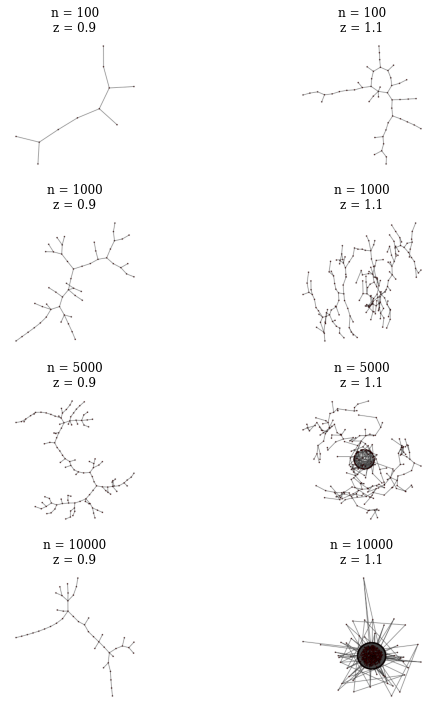

In [5]:
# Mudar a fonte (para ficar mais parecido com o LaTeX)
plt.rcParams["font.family"] = "serif"

# ==== Parameters Override ====
z = [0.9, 1.1]

# ==== Execution ====
line_num = 0
plt.figure(figsize=(10,10))
for n in n_per_simulation:
    plot_num = 0
    for i in range(0, len(z)):
        g = generate_binomial_network(z[i] / n, n)
        g = g.components(STRONG)
        g = g.giant()
        filename = "giant-component_n" + str(n) + "_z" + str(z[i]) + ".png"
        plot_graph(g, "kamada_kawai", filename)
        img = mpimg.imread("plots/" + filename)
        plt.subplot2grid((len(n_per_simulation), len(z)), (line_num, plot_num))
        plt.imshow(img)
        plt.title("n = " + str(n) + "\n" + "z = " + str(z[i]))
        plt.axis("off")
        plot_num = plot_num + 1
    line_num = line_num + 1
plt.tight_layout()
plt.savefig('plots/visual-analysis.png')
plt.show()

---
# Componentes Gigantes

## Tamanho Relativo

### Parâmetros editáveis

In [6]:
# ==== Parâmetros ====
num_simulations = 5
n_per_simulation = [1000, 5000, 10000]  
z = [0.4, 0.8, 1.2, 1.6, 2.0]

### Calculando o tamanho relativo (médio)

In [7]:
for n in n_per_simulation:
    print('---------- ', str(n), ' nós -----------')
    for i in range(0, len(z)):
        print('  z = ', str(z[i]))
        avg1 = 0
        avg2 = 0
        for k in range(0, num_simulations):
            count = []
            g = generate_binomial_network(z[i] / n, n)
            gc = g.components(STRONG)
            for subgraph in gc.subgraphs():
                rel_size = subgraph.vcount() / n
                count.append(rel_size)
            count.sort(reverse=True)
            avg1 += count[0]
            if len(count) > 1:
                avg2 += count[1]
        avg1 = avg1 / num_simulations
        avg2 = avg2 / num_simulations
        print('    Avg. Rel. Biggest Component: ', str(avg1))
        print('    Avg. Rel. 2nd Biggest Component: ', str(avg2))

----------  1000  nós -----------
  z =  0.4
    Avg. Rel. Biggest Component:  0.0092
    Avg. Rel. 2nd Biggest Component:  0.006799999999999999
  z =  0.8
    Avg. Rel. Biggest Component:  0.034
    Avg. Rel. 2nd Biggest Component:  0.0184
  z =  1.2
    Avg. Rel. Biggest Component:  0.2798
    Avg. Rel. 2nd Biggest Component:  0.0466
  z =  1.6
    Avg. Rel. Biggest Component:  0.6422000000000001
    Avg. Rel. 2nd Biggest Component:  0.0114
  z =  2.0
    Avg. Rel. Biggest Component:  0.8013999999999999
    Avg. Rel. 2nd Biggest Component:  0.0064
----------  5000  nós -----------
  z =  0.4
    Avg. Rel. Biggest Component:  0.0021599999999999996
    Avg. Rel. 2nd Biggest Component:  0.0018800000000000002
  z =  0.8
    Avg. Rel. Biggest Component:  0.01456
    Avg. Rel. 2nd Biggest Component:  0.00916
  z =  1.2
    Avg. Rel. Biggest Component:  0.28156
    Avg. Rel. 2nd Biggest Component:  0.017599999999999998
  z =  1.6
    Avg. Rel. Biggest Component:  0.64476
    Avg. Rel. 2nd B

## Mostrando o surgimento de uma componente gigante
### Parâmetros editáveis

In [8]:
# ==== Parâmetros ====
num_simulations = 5
q = 0.001

n_min = 200
n_max = 5000
n_step = 200

# ==== Auxiliary Processing ====
n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(aux)
    aux = aux + n_step

### Análise

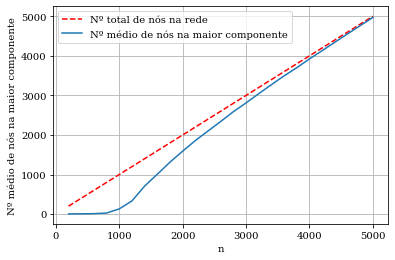

In [9]:
# Mudar a fonte (para ficar mais parecido com o LaTeX)
plt.rcParams["font.family"] = "serif"

y = []

for n in n_per_simulation:
    avg = 0
    for k in range(0, num_simulations):
        count = []
        g = generate_binomial_network(q, n)
        gc = g.components(STRONG)
        gc = gc.giant()
        avg += gc.vcount()
    avg = avg / num_simulations
    y.append(avg)

# Gráfico
plt.plot(n_per_simulation, n_per_simulation, 'r', linestyle='dashed')
plt.plot(n_per_simulation, y)

# Estilo
plt.xlabel("n")
plt.ylabel("Nº médio de nós na maior componente")
plt.grid(True)
labels = ['Nº total de nós na rede', 'Nº médio de nós na maior componente']
plt.legend(labels)

# Salvar a imagem
plt.savefig('plots/giant-component-growing.png', dpi=400)
plt.show()

In [10]:
# Parameter override
n_per_simulation = [100, 1000, 5000, 10000]


y1 = []
y2 = []

for n in n_per_simulation:
    print('---------- ', str(n), ' nós -----------')
    avg1 = 0
    avg2 = 0
    for k in range(0, num_simulations):
        count = []
        g = generate_binomial_network(q, n)
        gc = g.components(STRONG)
        for subgraph in gc.subgraphs():
            rel_size = subgraph.vcount() / n
            count.append(rel_size)
        count.sort(reverse=True)
        avg1 += count[0]
        if len(count) > 1:
            avg2 += count[1]
    avg1 = avg1 / num_simulations
    avg2 = avg2 / num_simulations
    y1.append(avg1)
    y2.append(avg2)
    
    print('    Avg. Rel. Biggest Component: ', str(avg1))
    print('    Avg. Rel. 2nd Biggest Component: ', str(avg2))

# # Gráfico
# plt.plot(n_per_simulation, n_per_simulation, 'r', linestyle='dashed')
# plt.plot(n_per_simulation, y)

# # Estilo
# plt.xlabel("n")
# plt.ylabel("Nº médio de nós na maior componente")
# plt.grid(True)
# labels = ['Nº total de nós na rede', 'Nº médio de nós na maior componente']
# plt.legend(labels)

# # Salvar a imagem
# plt.savefig('plots/giant-component-growing.png', dpi=400)
# plt.show()

----------  100  nós -----------
    Avg. Rel. Biggest Component:  0.026000000000000002
    Avg. Rel. 2nd Biggest Component:  0.022
----------  1000  nós -----------
    Avg. Rel. Biggest Component:  0.07060000000000001
    Avg. Rel. 2nd Biggest Component:  0.0294
----------  5000  nós -----------
    Avg. Rel. Biggest Component:  0.9930800000000002
    Avg. Rel. 2nd Biggest Component:  0.00032
----------  10000  nós -----------
    Avg. Rel. Biggest Component:  0.9999600000000001
    Avg. Rel. 2nd Biggest Component:  4e-05


---
## Variação do diâmetro com log(n)

### Parâmetros editáveis

In [11]:
# ==== Parâmetros ====
num_simulations = 10
z = 3

n_min = 1000
n_max = 5000
divs = 20

# ==== Auxiliary Processing ====
n_min = log(n_min)
n_max = log(n_max)
n_step = (n_max - n_min) / divs

n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(floor(exp(aux)))
    aux = aux + n_step

### Diâmetro

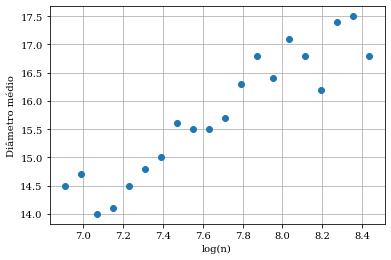

In [12]:
# Mudar a fonte (para ficar mais parecido com o LaTeX)
plt.rcParams["font.family"] = "serif"

# Diâmetro
d = []
for n in n_per_simulation:
    d_elem = 0
    for k in range(0, num_simulations):
        g = generate_binomial_network(z / n, n)
        d_elem += len(g.get_diameter()) - 1
    d_elem = d_elem / num_simulations
    d.append(d_elem)
# Logaritmo de n
log_n = []
for n in n_per_simulation:
    log_n.append(log(n))

# Gráfico
plt.plot(log_n, d, 'o')

# Estilo
plt.xlabel("log(n)")
plt.ylabel("Diâmetro médio")
plt.grid(True)
#labels = ['log(n)', 'Diâmetro médio']
#plt.legend(labels)

# Salvar a imagem
plt.savefig('plots/diameter.png', dpi=400)
plt.show()